## 1. Naloga
Dana je sivinska slika valley-1024x683-08bit.raw velikosti X×Y = 1024×683 slikovnih elementov, ki je zapisana v obliki surovih podatkov (RAW) z 8 biti na slikovni element.
Naložite in prikažite dano sliko.


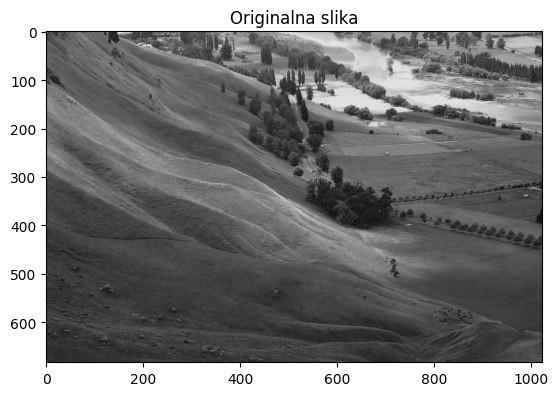

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

parent_folder = os.getcwd()
sys.path.append(parent_folder)

from OSV_lib import load_image, display_image

if __name__ == "__main__":
   ## 1. NALOGA
   I = load_image("vaja2/data/valley-1024x683-08bit.raw", (1024, 683), np.uint8)
   display_image(I, "Originalna slika")


## 2. Naloga
Napišite funkcijo za izračun histograma, normaliziranega histograma in kumulativne porazdelitve verjetnosti sivinskih vrednosti slike:

Kjer vhodni argument **iImage** predstavlja sliko, medtem ko izhodni argument **oHist** predstavlja histogram slike, **oProb** normalizirani histogram slike, **oCDF** kumulativno porazdelitev verjetnosti sivinskih vrednosti slike, **oLevels** pa pripadajoči vektor dinamičnega območja sivinskih vrednosti (upoštevajte, da je spodnja meja dinamičnega območja sivinskih vrednosti enaka nič: `smin = 0`).

Napišite tudi funkcijo za prikaz izbranega histograma slike:

Kjer vhodni argument **iHist** predstavlja histogram, normalizirani histogram ali kumulativno porazdelitev verjetnosti slike, **iLevels** pripadajoče dinamično območje sivinskih vrednosti slike, **iTitle** pa naslov prikaznega okna. Za prikazovanje histograma uporabite funkcijo `bar()`.

Izračunajte in prikažite histogram, normalizirani histogram in kumulativno porazdelitev verjetnosti sivinskih vrednosti dane slike.


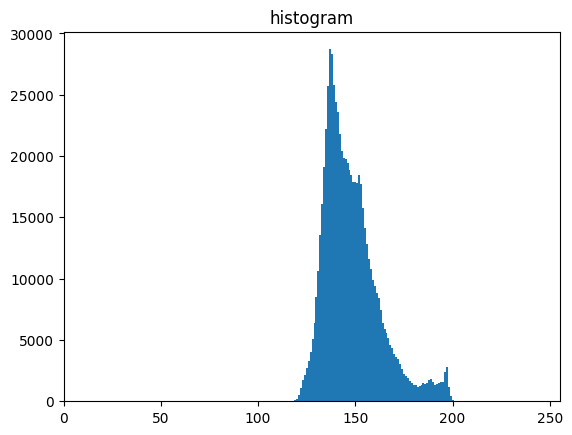

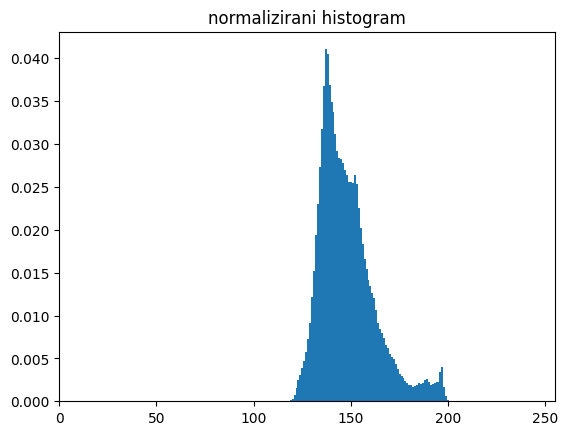

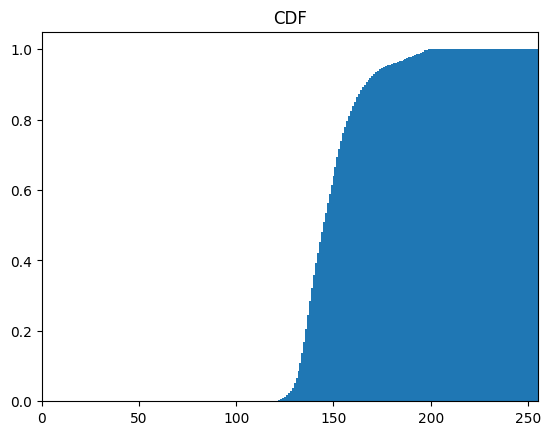

In [3]:
# funkcija za izračun histograma slike
def computeHistogram(iImage):

    #poiščemo pt. bitov za zapis obmocja od 0 do Lmax
    nBits = int(np.log2(iImage.max())) + 1  #preslikava v int samo odreže decimalno vrednost

    # dolocimo vektor sivinskih vrednosti opazovanega obmocja
    oLevels = np.arange(0,2 ** nBits, 1) #definira vektor od kje do kje , z kaksnim korakom

    #
    oHist = np.zeros(len(oLevels)) #rezerviramo plac za celoten vektor! Resimo se mem. problemov

    for y in range(iImage.shape[0]):
        for x in range(iImage.shape[1]):
            oHist[iImage[y,x]] = oHist[iImage[y,x]] + 1

    # delimo z vsoto pixlov da dobimo normaliziran historgram
    oProb = oHist / iImage.size

    oCDF = np.zeros_like(oHist)

     #izracun CDF

    for i in range(len(oProb)):
        oCDF[i] = oProb[: i + 1].sum() # : i + 1 pomeni da gremo cez cel array do i in sestejemo
    
    return oHist, oProb, oCDF, oLevels

#funkcija za izris histograma
def displayHistogram(iHist, iLevels, iTitle):

    plt.figure()
    plt.title(iTitle)
    plt.bar(iLevels, iHist, width=1)
    plt.xlim((iLevels.min(), iLevels.max()))
    plt.ylim((0,1.05*iHist.max()))
    plt.show()
    return

if __name__ == "__main__":
   ## 2. NALOGA
   h, p, c, l = computeHistogram(I)

   displayHistogram(h, l, "histogram")
   displayHistogram(p, l, "normalizirani histogram")
   displayHistogram(c, l, "CDF")


## 3. Naloga

Napišite funkcijo za določanje slike z izravnanim histogramom:

Kjer vhodni argument **iImage** predstavlja sliko, izhodni argument **oImage** pa sliko z izravnanim histogramom.  
Izravnavo histograma izvedete preko preslikave sivinskih vrednosti:

**si → T(si)**

pri čemer je funkcija preslikave **T** določena kot:

$$
T(s_i) = \left\lfloor \mathrm{CDF}(s_i)\cdot s_{\max} \right\rfloor,\qquad 0 \le s_i \le s_{\max}
$$

Kjer je **CDF** kumulativna porazdelitev verjetnosti sivinskih vrednosti,  
**s\_max** (oz. $s_{\max}$) pa zgornja meja dinamičnega območja sivinskih vrednosti.  
Operator $\lfloor\cdot\rfloor$ predstavlja zaokroževanje navzdol na celo število.

Za dano sliko določite sliko z izravnanim histogramom ter jo prikažite. Izračunajte in
prikažite tudi histogram, normalizirani histogram in kumulativno porazdelitev verjetnosti
sivinskih vrednosti slike z izravnanim histogramom.


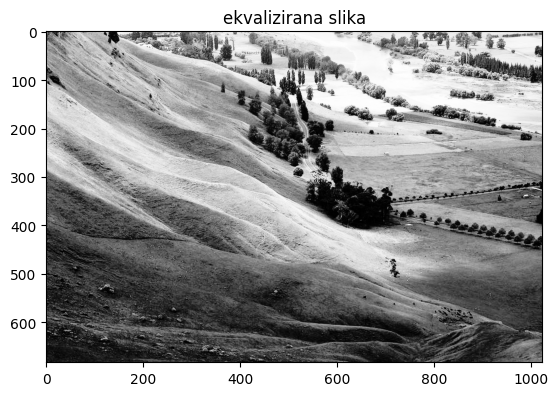

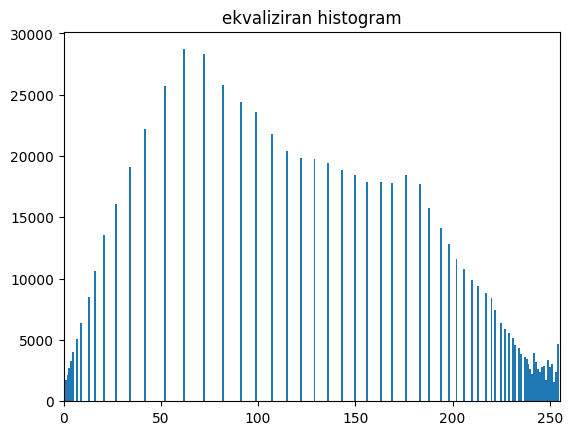

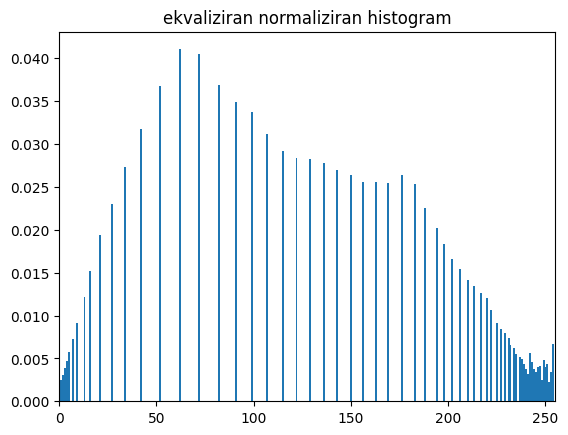

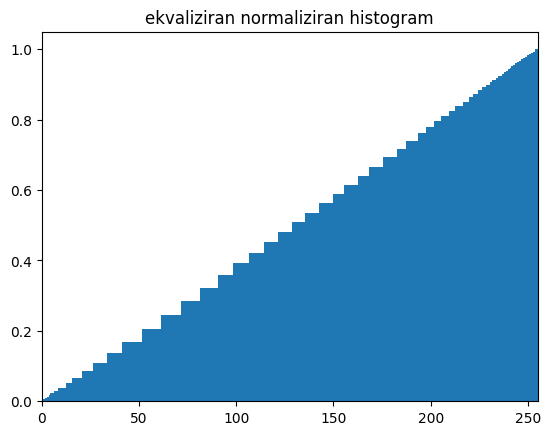

In [4]:
def eqializeHistogram(iImage):
    _, _, cdf, _ = computeHistogram(iImage)

    nBits = int(np.log2(iImage.max())) + 1

    max_intensity = 2 ** nBits - 1

    oImage = np.zeros_like(iImage)

    for y in range(iImage.shape[0]):
        for x in range(iImage.shape[1]):
            old_intensity = iImage[y,x]
            new_intensity = np.floor(cdf[old_intensity] * max_intensity)
            oImage[y,x] = new_intensity

    return oImage

if __name__ == "__main__":

   I_eq = eqializeHistogram(I)

   display_image(I_eq, "ekvalizirana slika")

   h_eq, p_eq, c_eq, l_eq = computeHistogram(I_eq)
   displayHistogram(h_eq, l_eq, "ekvaliziran histogram")
   displayHistogram(p_eq, l_eq, "ekvaliziran normaliziran histogram")
   displayHistogram(c_eq, l_eq, "ekvaliziran normaliziran histogram")


# DODATNO GRADIVO

## 3. naloga

Napišite funkcijo za izračun entropije slike brez uporabe naprednih funkcij iz Pythonovih knjižnic:

```python
def computeEntropy(iImage):
    # ...
    return oEntropy
```
Kjer vhodni argument iImage predstavlja sliko, izhodni argument oEntropy pa entropijo slike.

Zapišite vrednosti entropije za dano sliko ter za sliko z izravnanim histogramom.
Entropija katere slike je večja in zakaj?

In [6]:
def computeEntropy(iImage):
    _, p, _, _ = computeHistogram(iImage)
    oEntropy = 0
    for prob in p:
        if prob == 0:
            continue
        else:
            oEntropy = oEntropy + (prob * np.log2(prob))
    oEntropy = -oEntropy
    return oEntropy

if __name__ == "__main__":  
    print("Entropija za sliko je: ", round(computeEntropy(I), 4))
    print("Entropija za ekvalizirano sliko je: ", round(computeEntropy(I_eq), 4))


Entropija za sliko je:  5.6917
Entropija za ekvalizirano sliko je:  5.6374


## 4. Naloga

Napišite funkcijo, ki sliki doda aditiven Gaussov šum:

```python
def addNoise(iImage, iStd):
    # ...
    return oImage, oNoise
```
Kjer vhodni argument iImage predstavlja sliko, iStd pa standardni odklon dodanega šuma
(povprečna amplituda dodanega šuma je nič, modelirate ga s pomočjo funkcije randn(), ki jo najdete v knjižnici numpy, v modulu random).
Izhodni argument oImage predstavlja sliko z dodanim šumom, oNoise pa matriko dodanega šuma.

Opazujte slike z dodanim šumom ter pripadajoče histograme pri dodajanju šuma z različnim standardnim odklonom (npr. 2, 5, 10, 25 sivinskih vrednosti).
Na kaj morate biti pozorni pri prikazovanju slike šuma in pri računanju pripadajočega histograma?

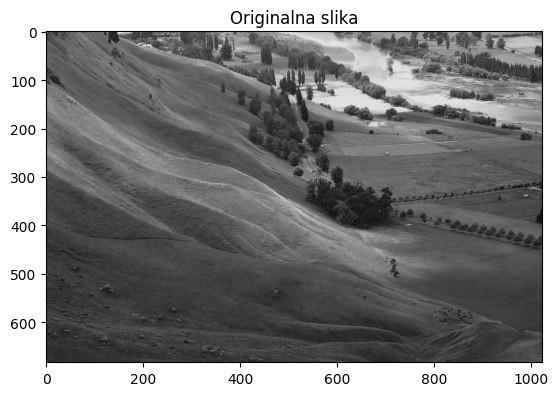

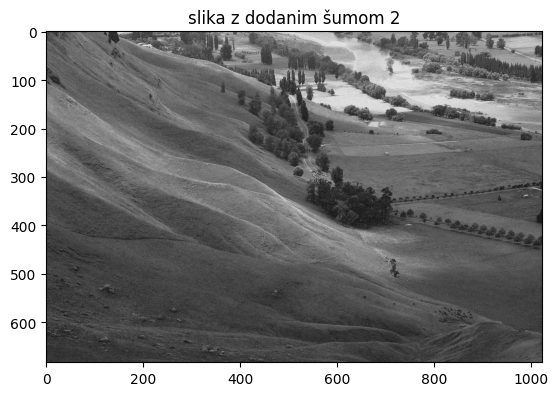

Noise matrika:  [[-0.02751888 -0.59275732 -1.74845471 ... -0.58301187 -3.80598611
   0.24170808]
 [ 1.56275671 -1.54949422 -1.05098449 ... -1.78989483  1.02216424
   3.59991783]
 [ 0.80723746 -0.70399484 -0.23463692 ... -0.6938332   0.59036542
  -0.1792344 ]
 ...
 [ 0.88038127  2.21493649 -2.49253517 ... -1.37591481 -0.07892125
  -1.80923161]
 [ 1.37100091 -3.65553128 -0.51677467 ... -0.4190081   1.57680655
   0.81043051]
 [-1.62506824  3.12815449 -0.26660252 ... -1.84500381 -3.33153182
  -0.86426566]]


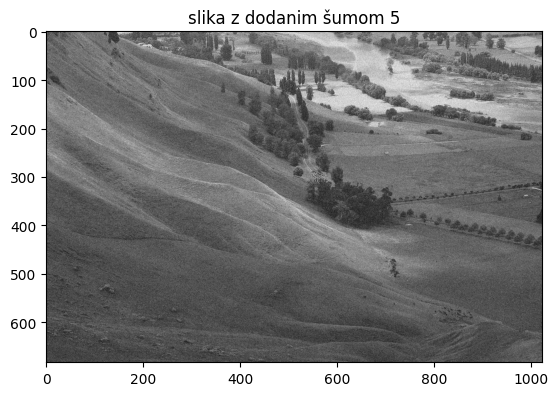

Noise matrika:  [[-4.2259045   0.40936026 -0.28911303 ...  0.07815318 -2.2142206
   6.9258239 ]
 [ 6.46638821 -7.97005568  2.84237407 ...  1.25462212  6.88291246
   2.31372879]
 [-6.99861518 -1.76906732 -6.36938276 ... -3.32634073 -3.29360035
  -2.83538785]
 ...
 [-0.02884047 -5.44948602 -7.71985601 ...  4.70989012 -2.70755947
   5.38887509]
 [-1.29037599  1.92573305 -1.26976662 ... -3.81373129  2.19753218
   6.34566485]
 [ 0.03857161  6.11630946  4.17986917 ...  7.66212066 -2.74430784
   1.93375655]]


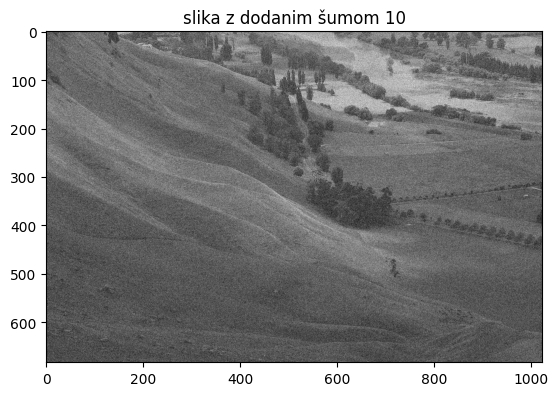

Noise matrika:  [[ -0.72179203  18.1801119   -0.7671691  ...  -0.23510025  18.38879331
  -16.47382696]
 [  1.29494208 -10.28008674 -18.59499407 ...  -9.48117183  16.78557419
   15.84823163]
 [  1.51938243   7.06463187   9.40980212 ...  22.52441561  -4.46697983
   -9.64401583]
 ...
 [ -3.13923827   5.23734805   1.91639206 ...  -8.60946362  -3.41993353
   17.97852625]
 [  4.07134743 -11.17303064 -11.76818317 ...   5.3043962    2.47233659
   12.65796339]
 [-15.70961903  -8.81078948 -13.26209691 ... -11.39472504   5.05920899
   14.91615294]]


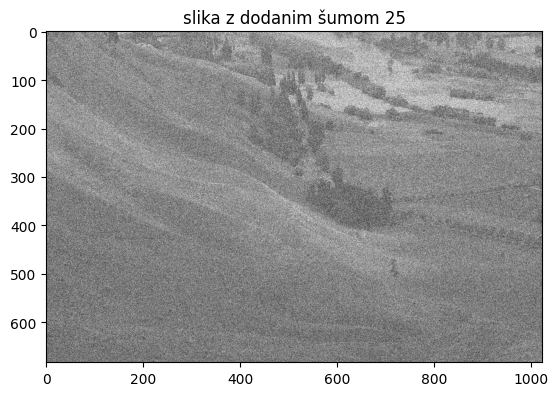

Noise matrika:  [[ 43.32218005  53.80253687 -19.31297252 ... -15.78280029  25.0565284
   24.55685843]
 [ 11.91982231   6.85359736  -4.41535341 ... -41.58067249   6.0410623
   11.91354944]
 [  3.35999889  26.01852034 -27.50670255 ...   4.97211623  -6.82266772
    9.03716236]
 ...
 [-22.94044969 -12.9057467   -2.26018945 ...   6.23862085  13.17623936
  -22.3653646 ]
 [ -9.31373653   0.4667869   -4.9172847  ...  -8.62772279  68.98998167
   26.08050898]
 [-61.00213961  23.09549854 -28.81606743 ... -29.91062338 -36.78879616
   38.12683988]]


In [9]:
def addNoise ( iImage , iStd ):
    oNoise = np.random.randn(*iImage.shape) * iStd   
    oImage_f = iImage.astype(np.float64) + oNoise
    oImage_f = np.clip(oImage_f, 0, 255)
    oImage = oImage_f.astype(np.uint8)
    return oImage, oNoise

if __name__ == "__main__":

    display_image(I, "Originalna slika")

    for std in [2, 5, 10, 25]:
        I_noise, noise = addNoise(I, std)
        display_image(I_noise, f"slika z dodanim šumom {std}")
        print("Noise matrika: ", noise)